In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
orders  = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\orders.csv\orders.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
department = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\departments.csv\departments.csv')
aisles = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\aisles.csv\aisles.csv')

In [5]:
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [6]:
aisles.aisle.nunique()

134

In [7]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
department.department.nunique()

21

In [9]:
products = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\products.csv\products.csv')
products.head()
#products.size

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
prod_order = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\order_products__train.csv\order_products__train.csv')

In [11]:
prod_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
prod_order_p = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\order_products__prior.csv\order_products__prior.csv')

In [13]:
prod_order_p.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
customer_orders = pd.merge(orders,prod_order,on = 'order_id')

In [17]:
customer_orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1
5,1187899,1,train,11,4,8,14.0,10258,6,1
6,1187899,1,train,11,4,8,14.0,13032,7,1
7,1187899,1,train,11,4,8,14.0,26088,8,1
8,1187899,1,train,11,4,8,14.0,27845,9,0
9,1187899,1,train,11,4,8,14.0,49235,10,1


In [18]:
customer_orders.days_since_prior_order.unique()

array([14., 30.,  6., 10.,  8., 11.,  7., 28.,  0.,  4., 13., 22., 16.,
       26.,  2.,  3., 29., 27., 23.,  5., 17., 21., 20., 15., 12., 18.,
        1., 25.,  9., 19., 24.])

In [20]:
customer_orders.order_dow.unique()

array([4, 1, 0, 2, 6, 3, 5], dtype=int64)

In [33]:
custgoods = customer_orders.groupby('user_id')['product_id'].apply(list).reset_index()
custgood = custgoods.set_index('user_id')

In [34]:
custgoods['product_id'].values[0]

[196, 25133, 38928, 26405, 39657, 10258, 13032, 26088, 27845, 49235, 46149]

In [35]:
custgood.tail()

,product_id
user_id,
206199,"[29429, 8898, 6128, 6701, 38855, 38341, 43821,..."
206200,"[22828, 13176, 39190, 34243, 8174, 27451, 1559..."
206203,"[15693, 37188, 21469, 41007, 2482, 14050, 2638..."
206205,"[27845, 21137, 28745, 22035, 24852, 46886, 314..."
206209,"[6846, 9405, 24852, 40603, 15655, 42606, 37966..."


In [36]:
l = custgood['product_id'][206199]

In [37]:
user_d = {}
for ind in custgood.index:
    l = [d[k] for k in custgood['product_id'][ind]]
    user_d[ind] = l

In [1]:
#dictionary contatining the departments from which a particular customer had bought goods from 
#user_d

# We have created a dictionary of the number of the departments from which a customer has bought the products forms

In [33]:
user_d[1]

['beverages',
 'dairy eggs',
 'dairy eggs',
 'household',
 'snacks',
 'snacks',
 'breakfast',
 'snacks',
 'dairy eggs',
 'dairy eggs',
 'beverages']

In [34]:
user_d[2]

['deli',
 'frozen',
 'snacks',
 'snacks',
 'produce',
 'produce',
 'produce',
 'produce',
 'produce',
 'produce',
 'produce',
 'dairy eggs',
 'snacks',
 'deli',
 'personal care',
 'deli',
 'frozen',
 'frozen',
 'frozen',
 'frozen',
 'frozen',
 'frozen',
 'frozen',
 'canned goods',
 'frozen',
 'frozen',
 'frozen',
 'snacks',
 'snacks',
 'canned goods',
 'canned goods']

In [37]:
prod_dept_temp = products.merge(department,how = 'left',on = 'department_id')
prod_dept_temp.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [40]:
print ("\nUnique values :  \n",prod_dept_temp.nunique())


Unique values :  
 product_id       49688
product_name     49688
aisle_id           134
department_id       21
department          21
dtype: int64


In [21]:
customer_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [26]:
days= orders[['user_id','order_dow']]

In [36]:
days.head(20)

,user_id,order_dow
0,1,2
1,1,3
2,1,3
3,1,4
4,1,4
5,1,2
6,1,1
7,1,1
8,1,1
9,1,4


In [31]:
days = days[0:500000]

In [33]:
famous_day= pd.crosstab(days['user_id'], days['order_dow'])
famous_day.head(10)

order_dow,0,1,2,3,4,5,6
user_id,,,,,,,
1,0,3,2,2,4,0,0
2,0,6,5,2,1,1,0
3,6,2,1,3,0,1,0
4,0,0,0,1,2,2,1
5,2,1,0,2,0,0,0
6,0,0,1,1,1,1,0
7,6,5,3,4,0,2,1
8,0,2,0,0,0,1,1
9,1,1,0,0,0,1,1


In [102]:
famous_day.shape

(30148, 7)

In [79]:
famous_day_12= famous_day.rename(columns={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [80]:
famous_day_12.head(10)

order_dow,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_id,,,,,,,
1,0,3,2,2,4,0,0
2,0,6,5,2,1,1,0
3,6,2,1,3,0,1,0
4,0,0,0,1,2,2,1
5,2,1,0,2,0,0,0
6,0,0,1,1,1,1,0
7,6,5,3,4,0,2,1
8,0,2,0,0,0,1,1
9,1,1,0,0,0,1,1


In [81]:
X= famous_day_12
pca = PCA(n_components = 3, whiten = True).fit(X)
X_pca = pca.transform(X)


In [82]:
print (pca.explained_variance_ratio_)
print (sum(pca.explained_variance_ratio_))

[0.5110888  0.17822918 0.10460055]
0.7939185387016008


In [83]:
w = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    w.append(kmeans.inertia_)

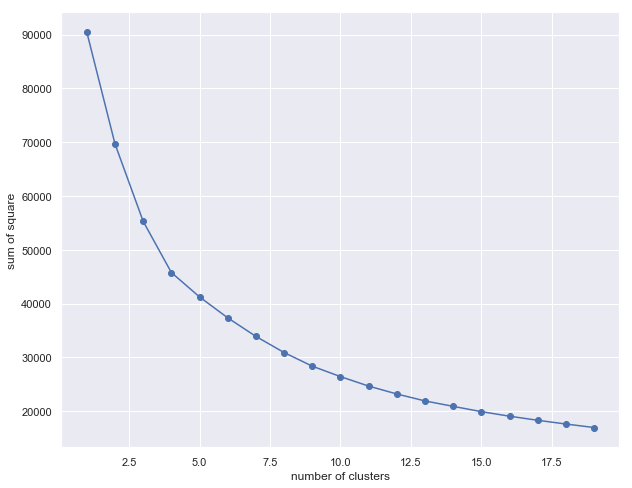

In [84]:
plt.figure(figsize = (10,8))
plt.plot(range(1,20),w,marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('sum of square')
plt.show()

In [85]:
final_cluster =  KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
final_cluster.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [90]:
famous_days_1 = pd.concat([famous_day_12.reset_index(drop =True),pd.DataFrame(X_pca)], axis = 1)
famous_days_1.columns.values[-3:] = ['0','1', '2']
famous_days_1['segment'] = final_cluster.labels_

In [91]:
temp = pd.DataFrame(X_pca)
print(temp)

              0         1         2
0     -0.296040 -0.869937  0.212123
1      0.005187 -1.212250  0.934406
2     -0.197326  0.528327  0.745439
3     -0.651503 -0.258389 -0.756469
4     -0.679370 -0.020347  0.313027
5     -0.749995 -0.393333 -0.365975
6      0.312590  0.205436  1.073614
7     -0.729463 -0.273833  0.093713
8     -0.747849  0.003658 -0.010746
9     -0.632064 -0.230918 -0.420131
10    -0.526393 -0.009463 -1.254236
11    -0.581281 -0.562715  0.156647
12    -0.300628  1.645977  0.290362
13    -0.140930 -0.391085 -0.963734
14     0.536148 -1.373086  1.524900
15    -0.552286  0.002437  0.544210
16     1.447453 -0.372303 -0.687000
17    -0.600565  0.415974  0.127906
18    -0.444668  0.210937 -1.197116
19    -0.653265 -0.566371  0.366420
20     1.321330 -2.468231  2.598556
21    -0.032296 -0.236677 -0.965157
22    -0.675180 -0.200088 -0.166043
23     0.094568  1.240030  0.238791
24    -0.716532 -0.213654  0.302047
25    -0.208080 -0.788562 -1.007423
26     4.124603 -4.685284 -0

In [92]:
famous_days_1.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,0,1,2,segment
0,0,3,2,2,4,0,0,-0.296040,-0.869937,0.212123,4
1,0,6,5,2,1,1,0,0.005187,-1.212250,0.934406,0
2,6,2,1,3,0,1,0,-0.197326,0.528327,0.745439,1
3,0,0,0,1,2,2,1,-0.651503,-0.258389,-0.756469,4
4,2,1,0,2,0,0,0,-0.679370,-0.020347,0.313027,4


In [93]:
famous_days_1['segment_name'] = famous_days_1['segment'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})

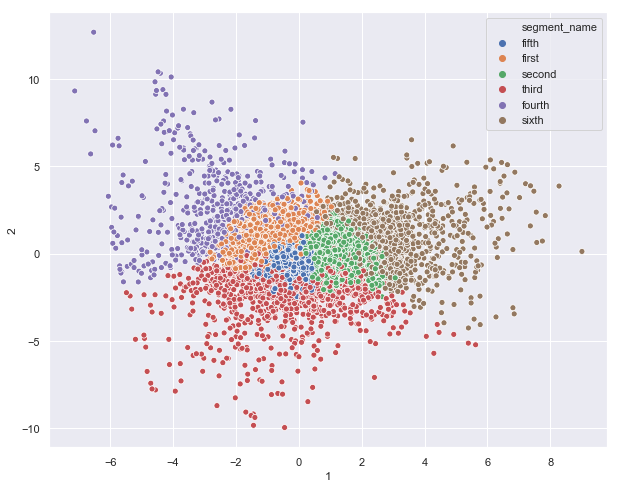

In [97]:
x_axis = famous_days_1['1']
y_axis = famous_days_1['2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = famous_days_1['segment_name'],)
plt.show()